# GuestEnv Extreme Configuration Tests

This notebook runs the `GuestEnv` environment with five extreme configurations to highlight differences between agents.

In [1]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.append(os.path.abspath('..'))
from env.env_gym import GuestEnv

In [2]:
def run_env(config, num_steps=200, seed=42):
    env = GuestEnv(**config)
    obs, info = env.reset(seed=seed)
    phoneme_history = []
    gini_history = []
    for _ in range(num_steps):
        action = env.action_space.sample()
        obs, reward, terminated, truncated, info = env.step(action)
        phoneme_history.append(info['phoneme'].copy())
        gini_history.append(1.0 - info['env_reward'])
        if terminated or truncated:
            break
    return np.array(phoneme_history), np.array(gini_history)

In [3]:
configs = [
    {"max_steps":200, "seed":0, "imbalance_factor":0.0, "energy_imbalance":0.0},
    {"max_steps":200, "seed":0, "imbalance_factor":0.2, "energy_imbalance":0.3},
    {"max_steps":200, "seed":0, "imbalance_factor":0.4, "energy_imbalance":0.5},
    {"max_steps":200, "seed":0, "imbalance_factor":0.6, "energy_imbalance":0.7},
    {"max_steps":200, "seed":0, "imbalance_factor":0.8, "energy_imbalance":0.9}
]

results = []
for cfg in configs:
    phonemes, gini = run_env(cfg, num_steps=200)
    results.append((phonemes, gini))

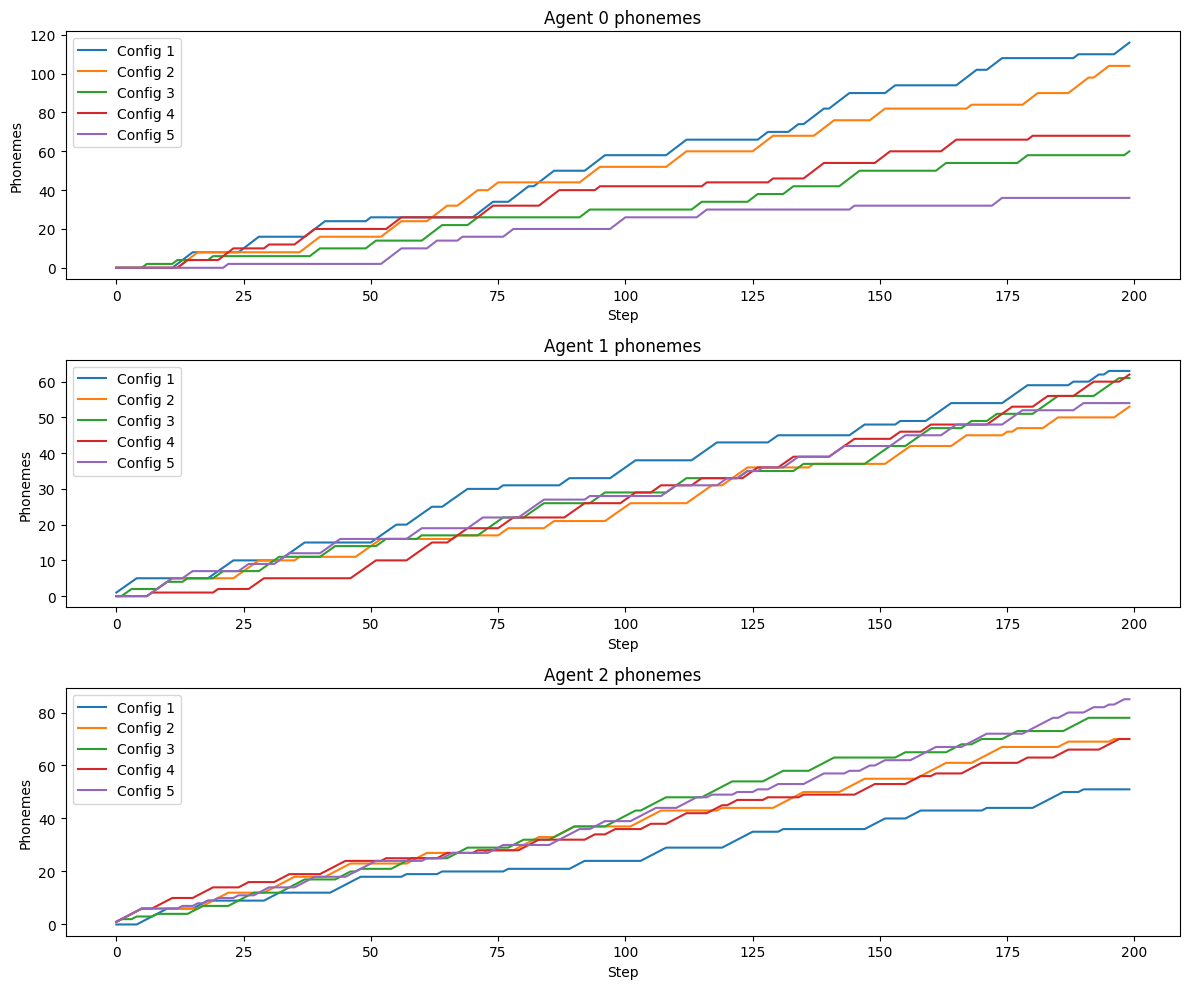

In [4]:
num_agents = results[0][0].shape[1]
labels = [f'Config {i+1}' for i in range(len(configs))]
plt.figure(figsize=(12, 10))
for agent in range(num_agents):
    plt.subplot(num_agents, 1, agent+1)
    for idx, (ph, _) in enumerate(results):
        plt.plot(ph[:, agent], label=labels[idx])
    plt.title(f'Agent {agent} phonemes')
    plt.xlabel('Step')
    plt.ylabel('Phonemes')
    plt.legend()
plt.tight_layout()
plt.show()

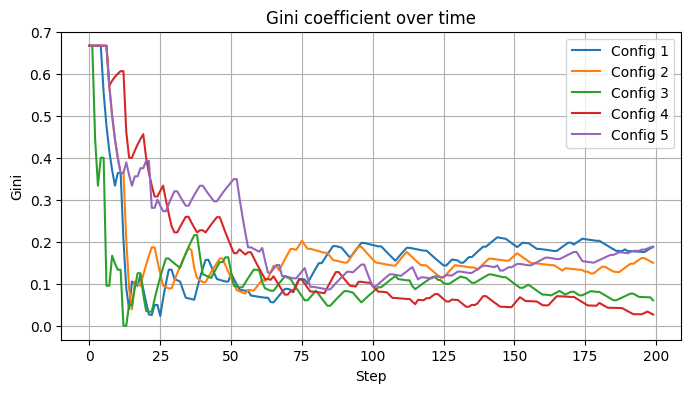

In [5]:
plt.figure(figsize=(8,4))
for idx, (_, gini) in enumerate(results):
    plt.plot(gini, label=labels[idx])
plt.title('Gini coefficient over time')
plt.xlabel('Step')
plt.ylabel('Gini')
plt.legend()
plt.grid(True)
plt.show()